- conversation about type 1 and 2 errors
- ANOVA tukey graph, talk about CI
- address log transformation
- fix effect size

<img src='images/Northwind_ERD_updated.png.'>

<a href='#2.0-Initial-Question'>**2.0 Initial Question**</a>

<a href='#2.1-Initial-Hypothesis'>**2.1 Initial Hypothesis**</a>
- <a href='#2.1.1-Null-Hypothesis'>2.1.1 Null Hypothesis</a>
- <a href='#2.1.2-Alternative-Hypothesis'>2.1.2 Alternative Hypothesis</a>
- <a href='#2.1.3-Features'>2.1.3 Features</a>
- <a href='#2.1.4-Target-Variable'>2.1.4 Target Variable</a>

<a href='#2.2-Methodology'>**2.2 Methodology**</a>
- <a href='#2.2.1-Obtain-Data'>2.2.1 Obtain Data</a>
- <a href='#2.2.2-Scrub-Data'>2.2.2 Scrub Data</a>
    - <a href='#2.2.2.1-Manage-n/a-data-types'>2.2.2.1 Manage n/a data types</a>
    - <a href='#2.2.2.2-Remove-duplicate-data'>2.2.2.2 Remove duplicate data</a>
    - <a href='#2.2.2.3-Manage-data-types'>2.2.2.3 Manage data types</a>
    - <a href='#2.2.2.4-Remove-outliers'>2.2.2.4 Remove outliers</a>
- <a href='#2.2.3-Explore-Data'>2.2.3 Explore Data</a>
    - <a href='#2.2.3.1-Visualize-data'>2.2.3.1 Visualize data</a>
    - <a href='#2.2.3.2-Transform-data'>2.2.3.2 Transform data</a>
    - <a href='#2.2.3.3-Sort-data-/-Prepare-data-for-testing'>2.2.3.3 Sort data / Prepare data for testing</a>
    - <a href='#2.2.3.4-Develop-feature'>2.2.3.4 Develop Feature</a>
- <a href='#2.2.4-Model-Data'>2.2.4 Model Data</a>
    - <a href='#2.2.4.1-Check-for-data-normality'>2.2.4.1 Check for data normality</a>
    - <a href='#2.2.4.2-Standard-deviation-and-other-basic-statistics'>2.2.4.2 Standard deviation and other basic statistics</a>
    - <a href='#2.2.4.3-Statistical-test'>2.2.4.3 Statistical test</a>
    - <a href='#2.2.4.4-Verification-techniques'>2.2.4.4 Verification techniques</a>
        - <a href='#2.2.4.4.1-Nonparametric-testing-and-confirmatory-testing'>2.2.4.4.1 Nonparametric testing</a>
        - <a href='#2.2.4.4.2-Effect-size'>2.2.4.4.2 Effect size</a>
        - <a href='#2.2.4.4.3-Error'>2.2.4.4.3 Error</a>
- <a href='#2.2.5-Interpret-Model'>2.2.5 Interpret Model</a>
    - <a href='#2.2.5.1-Extension-of-acquired-knowledge'>2.2.5.1 Extension of acquired knowledge</a>
    
<a href='#2.3-Results'>**2.3 Results**</a>

<a href='#2.4-Conclusions'>**2.4 Conclusions**</a>

- <a href='#2.4.1-Actionable-Items-and-Insights'>2.4.1 Actionable Items and Insights</a>
- <a href='#2.4.2-Additional-Visuals'>2.4.2 Additional Visuals</a>

<a href='#2.5-Future-Work'>**2.5 Future Work**</a>

<a href='#2.6-References'>**2.6 References**</a>

# 2.0 Initial Question<a id='Initial Question'></a>

### Does reorder and shipping company affect customer spending on an order? Which shipping company is best for what level of reorder?

# 2.1 Initial Hypothesis<a id='Initial Hypothesis'></a>

### 2.1.1 Null Hypothesis<a id='Null Hypothesis'></a>

H0: no effect - there is no change to spending based on reorder or frieght costs

### 2.1.2 Alternative Hypothesis<a id='Alternative Hypothesis'></a>

HA: there is an effect - there is a change to spending based on reorder or frieght costs

### 2.1.3 Features<a id='Features'></a>

: spending

### 2.1.4 Target Variable<a id='Target Variable'></a>

: reorder/frieght

# 2.2 Methodology<a id='Methodology'></a>

To evaluate, I have chosen to use the following steps:
- 2.2.1 Obtain Data
- 2.2.2 Scrub Data
- 2.2.3 Explore Data
- 2.2.4 Model Data
- 2.2.5 Interpret Model

I have found that the OSEMN method explains the data science process, and gives context to exploring data.

## 2.2.1 Obtain Data<a id='Obtain Data'></a>

In [54]:
# develop class
pass

In [55]:
# import py file
from classes import Pvalue

In [56]:
# import libraries
import pandas as pd
import sqlite3

import numpy as np
from numpy import std, mean, sqrt
import scipy.stats as stats
from scipy.stats import wilcoxon
from statsmodels.stats.power import tt_ind_solve_power
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('Solarize_Light2')
import seaborn as sns

idx = pd.IndexSlice

In [126]:
# import data
conn = sqlite3.Connection('Northwind_small.sqlite')
cur = conn.cursor()

# All data
cur.execute("""SELECT 'Order'.Id, OrderDate, Freight, ReorderLevel, Product.UnitPrice*Quantity as ItemTotal, OrderDetail.ProductId, OrderDetail.Discount, Shipper.CompanyName
               FROM OrderDetail
               LEFT JOIN 'Order' ON OrderDetail.OrderID = 'Order'.Id
               JOIN Product ON OrderDetail.ProductId = Product.Id
               JOIN Shipper ON 'Order'.ShipVia = Shipper.Id
               ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,OrderDate,Freight,ReorderLevel,ItemTotal,ProductId,Discount,CompanyName
0,10248,2012-07-04,32.38,30,252.00,11,0.0,Federal Shipping
1,10248,2012-07-04,32.38,0,140.00,42,0.0,Federal Shipping
2,10248,2012-07-04,32.38,0,174.00,72,0.0,Federal Shipping
3,10249,2012-07-05,11.61,0,209.25,14,0.0,Speedy Express
4,10249,2012-07-05,11.61,10,2120.00,51,0.0,Speedy Express


In [127]:
multi = df.copy(deep=True)
mulit = multi.set_index(['Id', 'ProductId', 'ReorderLevel', 'CompanyName'], inplace=True)
multi.head()

OrderDate  Freight  ItemTotal  \
Id    ProductId ReorderLevel CompanyName                                        
10248 11        30           Federal Shipping  2012-07-04    32.38     252.00   
      42        0            Federal Shipping  2012-07-04    32.38     140.00   
      72        0            Federal Shipping  2012-07-04    32.38     174.00   
10249 14        0            Speedy Express    2012-07-05    11.61     209.25   
      51        10           Speedy Express    2012-07-05    11.61    2120.00   

                                               Discount  
Id    ProductId ReorderLevel CompanyName                 
10248 11        30           Federal Shipping       0.0  
      42        0            Federal Shipping       0.0  
      72        0            Federal Shipping       0.0  
10249 14        0            Speedy Express         0.0  
      51        10           Speedy Express         0.0

In [128]:
shipping = multi.unstack('CompanyName')['ItemTotal']
shipping

CompanyName                   Federal Shipping  Speedy Express  United Package
Id    ProductId ReorderLevel                                                  
10248 11        30                       252.0             NaN             NaN
      42        0                        140.0             NaN             NaN
      72        0                        174.0             NaN             NaN
10249 14        0                          NaN          209.25             NaN
      51        10                         NaN         2120.00             NaN
...                                        ...             ...             ...
11077 64        30                         NaN             NaN            66.5
      66        20                         NaN             NaN            17.0
      73        5                          NaN             NaN            30.0
      75        25                         NaN             NaN            31.0
      77        15                         NaN             NaN            26.0

[2155 rows x 3 columns]

In [60]:
shipping_reorder = shipping.unstack('ReorderLevel')
shipping_reorder

ShipVia               1                               2            ...        \
ReorderLevel         0   5       10  15  20  25  30  0     5   10  ...    20   
Id    ProductId                                                    ...         
10248 11            NaN NaN     NaN NaN NaN NaN NaN NaN   NaN NaN  ...   NaN   
      42            NaN NaN     NaN NaN NaN NaN NaN NaN   NaN NaN  ...   NaN   
      72            NaN NaN     NaN NaN NaN NaN NaN NaN   NaN NaN  ...   NaN   
10249 14         209.25 NaN     NaN NaN NaN NaN NaN NaN   NaN NaN  ...   NaN   
      51            NaN NaN  2120.0 NaN NaN NaN NaN NaN   NaN NaN  ...   NaN   
...                 ...  ..     ...  ..  ..  ..  ..  ..   ...  ..  ...   ...   
11077 64            NaN NaN     NaN NaN NaN NaN NaN NaN   NaN NaN  ...   NaN   
      66            NaN NaN     NaN NaN NaN NaN NaN NaN   NaN NaN  ...  17.0   
      73            NaN NaN     NaN NaN NaN NaN NaN NaN  30.0 NaN  ...   NaN   
      75            NaN NaN     NaN NaN NaN NaN NaN NaN   NaN NaN  ...   NaN   
      77            NaN NaN     NaN NaN NaN NaN NaN NaN   NaN NaN  ...   NaN   

ShipVia                          3                             
ReorderLevel       25    30     0   5   10  15  20  25     30  
Id    ProductId                                                
10248 11          NaN   NaN    NaN NaN NaN NaN NaN NaN  252.0  
      42          NaN   NaN  140.0 NaN NaN NaN NaN NaN    NaN  
      72          NaN   NaN  174.0 NaN NaN NaN NaN NaN    NaN  
10249 14          NaN   NaN    NaN NaN NaN NaN NaN NaN    NaN  
      51          NaN   NaN    NaN NaN NaN NaN NaN NaN    NaN  
...               ...   ...    ...  ..  ..  ..  ..  ..    ...  
11077 64          NaN  66.5    NaN NaN NaN NaN NaN NaN    NaN  
      66          NaN   NaN    NaN NaN NaN NaN NaN NaN    NaN  
      73          NaN   NaN    NaN NaN NaN NaN NaN NaN    NaN  
      75         31.0   NaN    NaN NaN NaN NaN NaN NaN    NaN  
      77          NaN   NaN    NaN NaN NaN NaN NaN NaN    NaN  

[2155 rows x 21 columns]

Initial observations of data go here

In [61]:
def index_level_dtypes(df):
    return [f"{df.index.names[i]}: {df.index.get_level_values(n).dtype}"
            for i, n in enumerate(df.index.names)]

index_level_dtypes(shipping_reorder)

['Id: int64', 'ProductId: int64']

## 2.2.2 Scrub Data<a id='Scrub Data'></a>

The following scrubbing techniques were applied to the original data:
- 2.2.2.1 Manage n/a data types
- 2.2.2.2 Remove duplicate rows
- 2.2.2.3 Manage data types
- 2.2.2.4 Remove outliers

### 2.2.2.1 Manage n/a data types<a id='Manage n/a data types'></a>

In [129]:
# nans identification
print(len(df))
df.isna().sum()

2155


Id              0
OrderDate       0
Freight         0
ReorderLevel    0
ItemTotal       0
ProductId       0
Discount        0
CompanyName     0
dtype: int64

### 2.2.2.2 Remove duplicate data<a id='Remove duplicate data'></a>

In [130]:
# identification of duplicate data
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 0


In [64]:
# code to drop duplicate row if necessary
# df.drop_duplicates(inplace=True)
# print('duplicated rows: ' + str(df.duplicated().sum()))

### 2.2.2.3 Manage data types<a id='Manage data types'></a>

In [131]:
# data type identification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
Id              2155 non-null int64
OrderDate       2155 non-null object
Freight         2155 non-null float64
ReorderLevel    2155 non-null int64
ItemTotal       2155 non-null float64
ProductId       2155 non-null int64
Discount        2155 non-null float64
CompanyName     2155 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 134.8+ KB


In [140]:
# correction to data type if necessary
df['CompanyName'] = [str(x) for x in df['CompanyName']]

In [141]:
# verification of correction to data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 9 columns):
Id              2155 non-null int64
OrderDate       2155 non-null object
Freight         2155 non-null float64
ReorderLevel    2155 non-null int64
ItemTotal       2155 non-null float64
ProductId       2155 non-null int64
Discount        2155 non-null float64
CompanyName     2155 non-null object
Reorder         2155 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 151.6+ KB


### 2.2.2.4 Remove outliers<a id='Remove outliers'></a>

## 2.2.3 Explore Data<a id='Explore Data'></a>

For a quick preview of what we have to work with, we'll use the describe method.

- 2.2.3.1 Visualize data
- 2.2.3.2 Transform data
- 2.2.3.3 Sort data / Prepare data for testing
- 2.2.3.4 Develop Feature

### 2.2.3.1 Visualize data<a id='Visualize data'></a>

In [133]:
# describe data
df.describe()

,Id,Freight,ReorderLevel,ItemTotal,ProductId,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,96.197726,11.900232,672.560237,40.793039,0.056167
std,241.378032,133.011272,10.791421,1110.261427,22.159019,0.083450
min,10248.000000,0.020000,0.000000,6.000000,1.000000,0.000000
25%,10451.000000,19.610000,0.000000,170.500000,22.000000,0.000000
50%,10657.000000,53.800000,10.000000,380.000000,41.000000,0.000000
75%,10862.500000,120.920000,20.000000,760.000000,60.000000,0.100000
max,11077.000000,1007.640000,30.000000,15810.000000,77.000000,0.250000


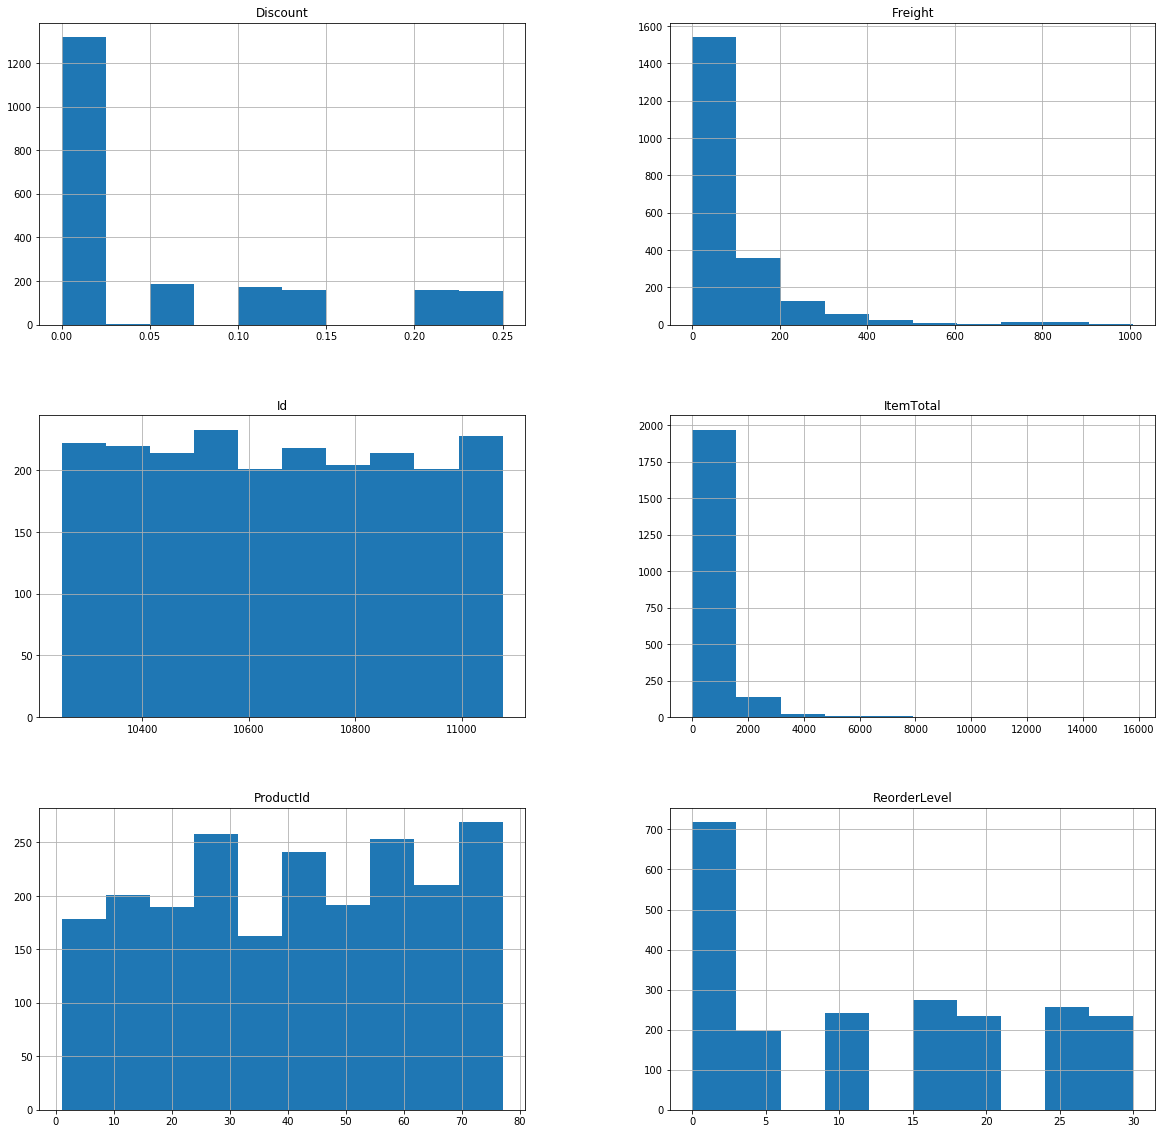

In [134]:
# visualize data
df.hist(figsize=(20,20));

### 2.2.3.2 Transform data<a id='Transform data'></a>

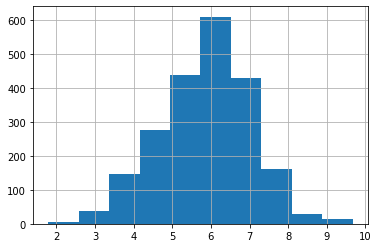

In [69]:
df['ItemTotal'] = df['ItemTotal'].map(lambda x: np.log(x))
df.ItemTotal.hist();

# for inverse
# df['ItemTotal'] = df['ItemTotal'].map(lambda x: np.log(np.exp(x)))
# df.ItemTotal.hist()

### 2.2.3.3 Sort data / Prepare data for testing<a id='Sort data'></a>

In [135]:
# sort data
df_reorder = df[df['ReorderLevel'] != 0]
df_reorder.head()

,Id,OrderDate,Freight,ReorderLevel,ItemTotal,ProductId,Discount,CompanyName
0,10248,2012-07-04,32.38,30,252.0,11,0.00,Federal Shipping
4,10249,2012-07-05,11.61,10,2120.0,51,0.00,Speedy Express
5,10250,2012-07-08,65.83,10,96.5,41,0.00,United Package
6,10250,2012-07-08,65.83,10,1855.0,51,0.15,United Package
8,10251,2012-07-08,41.34,25,126.0,22,0.05,Speedy Express


In [136]:
df_no_reorder = df[df['ReorderLevel'] == 0]
df_no_reorder.head()

,Id,OrderDate,Freight,ReorderLevel,ItemTotal,ProductId,Discount,CompanyName
1,10248,2012-07-04,32.38,0,140.00,42,0.00,Federal Shipping
2,10248,2012-07-04,32.38,0,174.00,72,0.00,Federal Shipping
3,10249,2012-07-05,11.61,0,209.25,14,0.00,Speedy Express
7,10250,2012-07-08,65.83,0,315.75,65,0.15,United Package
10,10251,2012-07-08,41.34,0,421.00,65,0.00,Speedy Express


### 2.2.3.4 Develop feature<a id='Develop feature'></a>

In [137]:
# create features
df_str = df.copy(deep=True)
df['Reorder'] = [1 if x != 0 else 0 for x in df['ReorderLevel']]
df_str['Reorder'] = ['Reorder' if x != 0 else 'No Reorder' for x in df['ReorderLevel']]
for x, y in enumerate(df_str['ReorderLevel']):
    if y == 0:
        df_str.loc[x,'ReorderLevel'] = 'Zero'
    elif y == 5:
        df_str.loc[x,'ReorderLevel'] = 'Five'
    elif y == 10:
        df_str.loc[x,'ReorderLevel'] = 'Ten'
    elif y == 15:
        df_str.loc[x,'ReorderLevel'] = 'Fifteen'
    elif y == 20:
        df_str.loc[x,'ReorderLevel'] = 'Twenty'
    elif y == 25:
        df_str.loc[x,'ReorderLevel'] = 'Twenty Five'
    else:
        df_str.loc[x,'ReorderLevel'] = 'Thirty'
print(df.head())
print(df_str.head())

      Id   OrderDate  Freight  ReorderLevel  ItemTotal  ProductId  Discount  \
0  10248  2012-07-04    32.38            30     252.00         11       0.0   
1  10248  2012-07-04    32.38             0     140.00         42       0.0   
2  10248  2012-07-04    32.38             0     174.00         72       0.0   
3  10249  2012-07-05    11.61             0     209.25         14       0.0   
4  10249  2012-07-05    11.61            10    2120.00         51       0.0   

        CompanyName  Reorder  
0  Federal Shipping        1  
1  Federal Shipping        0  
2  Federal Shipping        0  
3    Speedy Express        0  
4    Speedy Express        1  
      Id   OrderDate  Freight ReorderLevel  ItemTotal  ProductId  Discount  \
0  10248  2012-07-04    32.38       Thirty     252.00         11       0.0   
1  10248  2012-07-04    32.38         Zero     140.00         42       0.0   
2  10248  2012-07-04    32.38         Zero     174.00         72       0.0   
3  10249  2012-07-05    11.

## 2.2.4 Model Data<a id='Model Data'></a>

- 2.2.4.1 Check for data normality
- 2.2.4.2 Standard deviation and other basic statistics
- 2.2.4.3 Statistical test
- 2.2.4.4 Verification techniques

### 2.2.4.1 Check for data normality<a id='Data normality'></a>

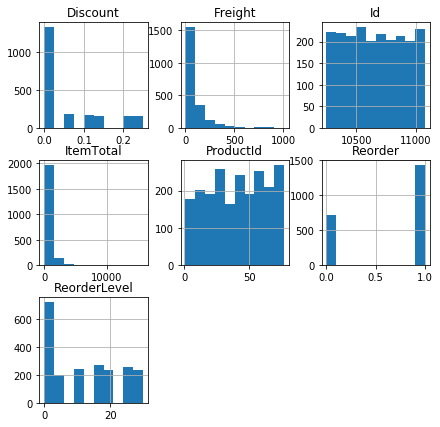

In [142]:
# visual/code for data normality
df.hist(figsize=(7,7));

### 2.2.4.2 Standard deviation and other basic statistics<a id='Standard deviation'></a>

In [143]:
# standard deviation for target variable
print('ItemTotal')
print('numbers of samples: ' + str(len(df['ItemTotal'])))
print('mean: ' + str(mean(df['ItemTotal'])))
print('standard deviation: ' + str(std(df['ItemTotal'])))
print('population variance: ' + str(std(df['ItemTotal'])**2))
print('skew: ' + str(df['ItemTotal'].skew()))
print('Reorder')
print('numbers of samples: ' + str(len(df['Reorder'])))
print('mean: ' + str(mean(df['Reorder'])))
print('standard deviation: ' + str(std(df['Reorder'])))
print('population variance: ' + str(std(df['Reorder'])**2))
print('skew: ' + str(df['Reorder'].skew()))

ItemTotal
numbers of samples: 2155
mean: 672.5602366589327
standard deviation: 1110.003796118042
population variance: 1232108.4273964635
skew: 6.768150799861715
Reorder
numbers of samples: 2155
mean: 0.6668213457076566
standard deviation: 0.4713498049392686
population variance: 0.22217063861628655
skew: -0.7083383265426805


### 2.2.4.3 Statistical test<a id='Statistical test'></a>

In [76]:
# set up variables for this particular test
alpha = 0.05

In [145]:
# test
ols_results = sm.stats.anova_lm(ols('ItemTotal ~ CompanyName + Reorder', data=df_str).fit())
ols_results

,df,sum_sq,mean_sq,F,PR(>F)
CompanyName,2.0,3.445841e+06,1.722920e+06,1.422992,2.412186e-01
Reorder,1.0,4.737530e+07,4.737530e+07,39.128143,4.774064e-10
Residual,2151.0,2.604373e+09,1.210773e+06,NaN,NaN


In [147]:
# result
companyName_pvalue = ols_results.loc['CompanyName', 'PR(>F)']
reorder_pvalue = ols_results.loc['Reorder', 'PR(>F)']

In [148]:
# evaluation of result
if alpha > companyName_pvalue:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


In [149]:
# evaluation of result
if alpha > reorder_pvalue:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


Summarize results and determine next steps. Might include verification of sample size, error types, non-parametric testing, or a deepening of understanding

### 2.2.4.4 Verification techniques<a id='Verification techniques'></a>

#### 2.2.4.4.1 Nonparametric testing and confirmatory testing<a id='Nonparametric testing'></a>

##### Nonparametric testing

In [156]:
df['CompanyName'].unique()

array(['Federal Shipping', 'Speedy Express', 'United Package'],
      dtype=object)

In [157]:
# non-parametric testing variables
shipVia1 = df[df['CompanyName'] == 'Federal Shipping']
shipVia1_reorder0 = shipVia1[shipVia1['Reorder'] == 0]['ItemTotal']
shipVia1_reorder1 = shipVia1[shipVia1['Reorder'] == 1]['ItemTotal']
shipVia2 = df[df['CompanyName'] == 'Speedy Express']
shipVia2_reorder0 = shipVia2[shipVia2['Reorder'] == 0]['ItemTotal']
shipVia2_reorder1 = shipVia2[shipVia2['Reorder'] == 1]['ItemTotal']
shipVia3 = df[df['CompanyName'] == 'United Package']
shipVia3_reorder0 = shipVia3[shipVia3['Reorder'] == 0]['ItemTotal']
shipVia3_reorder1 = shipVia3[shipVia3['Reorder'] == 1]['ItemTotal']

In [158]:
# non-parametric test
kruskal_results = stats.kruskal(shipVia1_reorder0, shipVia1_reorder1, shipVia2_reorder0, shipVia2_reorder1, shipVia3_reorder0, shipVia3_reorder1)
kruskal_results

KruskalResult(statistic=120.67769879906302, pvalue=2.2551786635363805e-24)

In [159]:
# result
p_value = kruskal_results[1]
p_value

2.2551786635363805e-24

In [160]:
# evaluation of results
if alpha > p_value:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


##### Confirmatory testing

In [162]:
# confirmatory test for ANOVA is TukeyHSD
tukey_results = pairwise_tukeyhsd(df_str['ItemTotal'], df_str['CompanyName']+ df_str['Reorder'])
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Federal ShippingNo Reorder,Federal ShippingReorder,-262.4791,0.0481,-523.6762,-1.2819,True
Federal ShippingNo Reorder,Speedy ExpressNo Reorder,-93.8362,0.9,-395.788,208.1155,False
Federal ShippingNo Reorder,Speedy ExpressReorder,-322.8532,0.0056,-583.539,-62.1674,True
Federal ShippingNo Reorder,United PackageNo Reorder,126.7029,0.7691,-155.4177,408.8235,False
Federal ShippingNo Reorder,United PackageReorder,-291.153,0.0114,-540.5522,-41.7537,True
Federal ShippingReorder,Speedy ExpressNo Reorder,168.6428,0.4482,-94.1654,431.4511,False
Federal ShippingReorder,Speedy ExpressReorder,-60.3741,0.9,-274.5012,153.753,False
Federal ShippingReorder,United PackageNo Reorder,389.182,0.001,149.4209,628.943,True
Federal ShippingReorder,United PackageReorder,-28.6739,0.9,-228.907,171.5592,False
Speedy ExpressNo Reorder,Speedy ExpressReorder,-229.0169,0.1269,-491.3169,33.2831,False


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


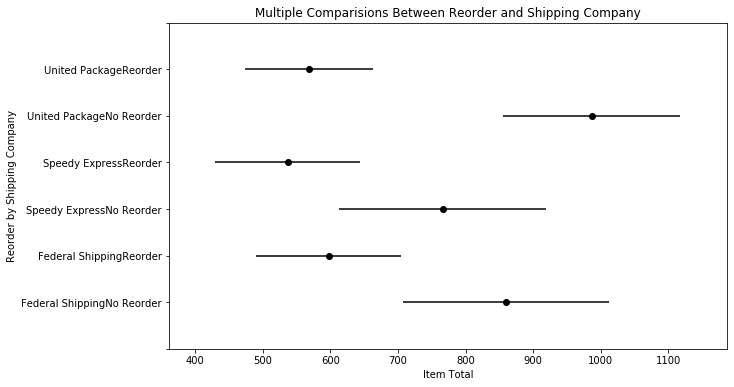

In [175]:
# create figure
fig05 = plt.figure(figsize=(5,4))
ax = fig05.add_subplot(111)

# run tukeys
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(df_str['ItemTotal'], df_str['CompanyName']+df_str['Reorder'])
tukey_plot = tukey_results.plot_simultaneous(ax=ax).show() 

# format plot
ax.axes.set_title('Multiple Comparisions Between Reorder and Shipping Company')
ax.axes.set_ylabel('Reorder by Shipping Company')
ax.axes.set_xlabel('Item Total')
plt.show();

Oberservations based on new finding

#### 2.2.4.4.2 Effect size<a id='Effect size'></a>
Cohen's D

In [86]:
# effect size variables
pass

In [176]:
# effect size test
def cohen_d_two_samp(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)
effect_size = cohen_d_two_samp(df_str['ItemTotal'], df_str['CompanyName']+df_str['ReorderLevel'])
effect_size

TypeError: Could not convert Federal ShippingThirtyFederal ShippingZeroFederal ShippingZeroSpeedy ExpressZeroSpeedy ExpressTenUnited PackageTenUnited PackageTenUnited PackageZeroSpeedy ExpressTwenty FiveSpeedy ExpressTwentySpeedy ExpressZeroUnited PackageZeroUnited PackageTwentyUnited PackageZeroUnited PackageTwentyUnited PackageFiveUnited PackageFifteenUnited PackageZeroUnited PackageTwentyUnited PackageFiveFederal ShippingTwenty FiveFederal ShippingTenFederal ShippingTwentyFederal ShippingZeroUnited PackageZeroUnited PackageFifteenFederal ShippingThirtyFederal ShippingFiveFederal ShippingFifteenSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressTwenty FiveFederal ShippingFiveFederal ShippingTwenty FiveSpeedy ExpressTenSpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressThirtyUnited PackageFiveUnited PackageFifteenFederal ShippingZeroFederal ShippingTenFederal ShippingThirtyFederal ShippingTenFederal ShippingZeroFederal ShippingFifteenFederal ShippingFiveFederal ShippingTwenty FiveFederal ShippingTenSpeedy ExpressZeroSpeedy ExpressThirtyFederal ShippingZeroSpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressTwentyFederal ShippingZeroFederal ShippingZeroSpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressTwenty FiveUnited PackageTwentyUnited PackageZeroUnited PackageTwentyUnited PackageZeroFederal ShippingZeroFederal ShippingTwentyFederal ShippingTwentyFederal ShippingThirtyFederal ShippingTwentySpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressZeroFederal ShippingZeroFederal ShippingFiveFederal ShippingZeroFederal ShippingZeroUnited PackageFifteenUnited PackageZeroUnited PackageFiveUnited PackageFiveUnited PackageZeroSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressTwenty FiveSpeedy ExpressFiveSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressFifteenSpeedy ExpressTwentyFederal ShippingFiveFederal ShippingFiveFederal ShippingZeroFederal ShippingZeroSpeedy ExpressThirtySpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressTenUnited PackageTenUnited PackageThirtyUnited PackageZeroFederal ShippingFifteenFederal ShippingZeroFederal ShippingTenFederal ShippingFifteenFederal ShippingZeroSpeedy ExpressTenSpeedy ExpressFifteenFederal ShippingTwenty FiveFederal ShippingThirtySpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressFifteenUnited PackageFiveUnited PackageFifteenUnited PackageTenUnited PackageZeroFederal ShippingZeroFederal ShippingZeroFederal ShippingFiveFederal ShippingTwenty FiveUnited PackageTenUnited PackageZeroUnited PackageTwenty FiveUnited PackageZeroUnited PackageTwenty FiveUnited PackageThirtySpeedy ExpressThirtySpeedy ExpressTenSpeedy ExpressFifteenUnited PackageFiveUnited PackageZeroUnited PackageTwenty FiveUnited PackageTwentyUnited PackageZeroUnited PackageZeroUnited PackageFiveUnited PackageThirtyUnited PackageTwentyUnited PackageFifteenUnited PackageThirtyUnited PackageThirtyUnited PackageZeroUnited PackageZeroUnited PackageTwenty FiveUnited PackageThirtyUnited PackageZeroUnited PackageFifteenUnited PackageFifteenUnited PackageZeroUnited PackageZeroFederal ShippingZeroFederal ShippingZeroFederal ShippingFiveFederal ShippingFifteenFederal ShippingZeroFederal ShippingTenUnited PackageZeroUnited PackageFifteenFederal ShippingFifteenFederal ShippingThirtySpeedy ExpressZeroSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressTwenty FiveSpeedy ExpressZeroUnited PackageTenUnited PackageZeroFederal ShippingZeroFederal ShippingFifteenUnited PackageZeroUnited PackageTwenty FiveUnited PackageZeroUnited PackageTwenty FiveUnited PackageTwentyUnited PackageTwenty FiveUnited PackageTwentyUnited PackageZeroUnited PackageFifteenUnited PackageThirtyFederal ShippingTenFederal ShippingZeroSpeedy ExpressTenUnited PackageTenUnited PackageTwentyFederal ShippingZeroFederal ShippingZeroFederal ShippingTwentyFederal ShippingZeroUnited PackageFifteenFederal ShippingTwenty FiveSpeedy ExpressFiveSpeedy ExpressThirtySpeedy ExpressFiveSpeedy ExpressTenSpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressFiveFederal ShippingTwenty FiveFederal ShippingFiveFederal ShippingZeroFederal ShippingTwentyFederal ShippingZeroUnited PackageZeroUnited PackageTwentyUnited PackageTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressFifteenSpeedy ExpressTwentyFederal ShippingZeroFederal ShippingZeroFederal ShippingFifteenUnited PackageFiveUnited PackageFifteenUnited PackageFifteenUnited PackageThirtySpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressTenUnited PackageZeroUnited PackageZeroUnited PackageZeroFederal ShippingZeroFederal ShippingFiveFederal ShippingZeroUnited PackageTwenty FiveUnited PackageFifteenUnited PackageTwenty FiveUnited PackageTwentyUnited PackageTwenty FiveUnited PackageTenUnited PackageZeroFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingTwentyFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingZeroFederal ShippingFifteenUnited PackageZeroUnited PackageZeroUnited PackageZeroFederal ShippingZeroFederal ShippingTenFederal ShippingTwenty FiveFederal ShippingTwentyFederal ShippingZeroUnited PackageTwenty FiveUnited PackageTwentyUnited PackageTwentyUnited PackageTwentySpeedy ExpressThirtySpeedy ExpressFifteenSpeedy ExpressTwentyUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageFiveUnited PackageZeroFederal ShippingZeroFederal ShippingThirtyFederal ShippingThirtyFederal ShippingFiveFederal ShippingThirtyFederal ShippingTwenty FiveUnited PackageTenUnited PackageTwenty FiveSpeedy ExpressTenUnited PackageThirtyUnited PackageFifteenSpeedy ExpressFifteenSpeedy ExpressTenSpeedy ExpressFifteenSpeedy ExpressZeroFederal ShippingZeroFederal ShippingTenFederal ShippingThirtyFederal ShippingFifteenFederal ShippingTenFederal ShippingZeroSpeedy ExpressZeroSpeedy ExpressTwentyUnited PackageTwentyUnited PackageTwentyUnited PackageFifteenFederal ShippingZeroFederal ShippingZeroFederal ShippingZeroSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressTwentyFederal ShippingTenFederal ShippingTwentyFederal ShippingZeroFederal ShippingZeroFederal ShippingZeroFederal ShippingFifteenFederal ShippingFifteenFederal ShippingTenUnited PackageFiveUnited PackageZeroSpeedy ExpressThirtySpeedy ExpressTenSpeedy ExpressTenFederal ShippingTwentyFederal ShippingTwenty FiveFederal ShippingTwentySpeedy ExpressFifteenSpeedy ExpressZeroUnited PackageThirtyUnited PackageZeroUnited PackageFifteenFederal ShippingFifteenFederal ShippingTenFederal ShippingZeroFederal ShippingFifteenUnited PackageFiveUnited PackageZeroUnited PackageTwentyUnited PackageThirtyUnited PackageZeroUnited PackageThirtyUnited PackageTenUnited PackageThirtyUnited PackageFiveSpeedy ExpressTwentyUnited PackageZeroUnited PackageFifteenUnited PackageZeroUnited PackageZeroFederal ShippingTwentyFederal ShippingZeroFederal ShippingTwentyFederal ShippingTwentyUnited PackageZeroUnited PackageTenUnited PackageTwentyFederal ShippingZeroFederal ShippingFiveFederal ShippingZeroSpeedy ExpressTenSpeedy ExpressFiveSpeedy ExpressZeroFederal ShippingFifteenFederal ShippingZeroFederal ShippingZeroFederal ShippingThirtyFederal ShippingFiveSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressFiveFederal ShippingFiveFederal ShippingThirtyFederal ShippingThirtyFederal ShippingZeroFederal ShippingZeroUnited PackageTenUnited PackageZeroUnited PackageFifteenFederal ShippingZeroFederal ShippingFifteenUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageZeroSpeedy ExpressFifteenSpeedy ExpressTwenty FiveSpeedy ExpressZeroUnited PackageZeroUnited PackageTwentyUnited PackageZeroUnited PackageThirtySpeedy ExpressTwentySpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressZeroFederal ShippingFiveFederal ShippingFifteenFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingThirtyFederal ShippingZeroFederal ShippingTwentyFederal ShippingFiveFederal ShippingZeroSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressFifteenFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingZeroSpeedy ExpressFiveSpeedy ExpressTenFederal ShippingFifteenFederal ShippingTwentyFederal ShippingFifteenFederal ShippingZeroFederal ShippingTwentyFederal ShippingFifteenFederal ShippingZeroFederal ShippingFifteenFederal ShippingFifteenSpeedy ExpressFifteenSpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressZeroUnited PackageTwenty FiveUnited PackageFiveFederal ShippingTenFederal ShippingTwenty FiveSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressTwenty FiveSpeedy ExpressTenSpeedy ExpressFiveSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressThirtyUnited PackageThirtyUnited PackageFifteenUnited PackageZeroSpeedy ExpressTwenty FiveSpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressFiveFederal ShippingTwentyFederal ShippingZeroFederal ShippingTenFederal ShippingFifteenFederal ShippingZeroUnited PackageZeroUnited PackageTenUnited PackageZeroUnited PackageTwentyFederal ShippingFiveFederal ShippingTwentySpeedy ExpressZeroSpeedy ExpressTwentyFederal ShippingFiveFederal ShippingZeroFederal ShippingTwentyFederal ShippingFifteenFederal ShippingZeroFederal ShippingFifteenFederal ShippingFifteenSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressTwenty FiveSpeedy ExpressFiveUnited PackageZeroUnited PackageFifteenSpeedy ExpressZeroSpeedy ExpressFiveSpeedy ExpressThirtySpeedy ExpressFiveSpeedy ExpressFiveSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressZeroFederal ShippingTwentyFederal ShippingZeroUnited PackageFifteenUnited PackageFifteenUnited PackageFifteenUnited PackageTwentyUnited PackageTwentySpeedy ExpressThirtySpeedy ExpressThirtyUnited PackageZeroSpeedy ExpressZeroUnited PackageThirtyUnited PackageFiveSpeedy ExpressZeroSpeedy ExpressFiveSpeedy ExpressThirtySpeedy ExpressZeroUnited PackageZeroUnited PackageThirtyUnited PackageZeroUnited PackageZeroUnited PackageTenFederal ShippingThirtyUnited PackageThirtyUnited PackageTwentyUnited PackageTwenty FiveUnited PackageTwenty FiveUnited PackageZeroUnited PackageZeroUnited PackageThirtyUnited PackageThirtyUnited PackageTwenty FiveSpeedy ExpressZeroUnited PackageFiveUnited PackageFifteenUnited PackageTwentyFederal ShippingZeroFederal ShippingTenFederal ShippingThirtyFederal ShippingFiveUnited PackageTwenty FiveUnited PackageTenUnited PackageZeroUnited PackageTwenty FiveUnited PackageThirtyUnited PackageThirtyUnited PackageTenUnited PackageTwentySpeedy ExpressThirtySpeedy ExpressZeroFederal ShippingZeroFederal ShippingZeroFederal ShippingFifteenFederal ShippingTenSpeedy ExpressFiveSpeedy ExpressTenSpeedy ExpressFiveSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressTwenty FiveUnited PackageFiveUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageThirtyUnited PackageZeroUnited PackageTwenty FiveUnited PackageZeroUnited PackageZeroUnited PackageTenFederal ShippingTwentyFederal ShippingThirtyFederal ShippingZeroFederal ShippingFifteenSpeedy ExpressZeroSpeedy ExpressFifteenUnited PackageTwenty FiveUnited PackageThirtyFederal ShippingTenFederal ShippingTwentyFederal ShippingZeroUnited PackageFiveUnited PackageZeroUnited PackageTwenty FiveUnited PackageZeroUnited PackageFiveUnited PackageFifteenSpeedy ExpressZeroFederal ShippingZeroFederal ShippingZeroFederal ShippingTwenty FiveFederal ShippingThirtyFederal ShippingZeroUnited PackageTenUnited PackageZeroUnited PackageZeroSpeedy ExpressFifteenSpeedy ExpressTwenty FiveFederal ShippingFiveFederal ShippingFifteenFederal ShippingTwentySpeedy ExpressFiveSpeedy ExpressTwenty FiveFederal ShippingFiveFederal ShippingZeroUnited PackageZeroUnited PackageTwenty FiveUnited PackageThirtyUnited PackageZeroFederal ShippingZeroFederal ShippingZeroFederal ShippingThirtyFederal ShippingFifteenFederal ShippingThirtySpeedy ExpressThirtySpeedy ExpressZeroUnited PackageZeroUnited PackageThirtyFederal ShippingFifteenFederal ShippingTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressTenSpeedy ExpressFifteenUnited PackageZeroUnited PackageTwenty FiveUnited PackageThirtyFederal ShippingTenFederal ShippingThirtySpeedy ExpressZeroSpeedy ExpressTenFederal ShippingTwentyFederal ShippingZeroUnited PackageZeroUnited PackageZeroUnited PackageThirtyUnited PackageTwenty FiveSpeedy ExpressTwentySpeedy ExpressTwentySpeedy ExpressTwentyFederal ShippingTwentyFederal ShippingThirtyUnited PackageTenUnited PackageFiveUnited PackageFiveFederal ShippingZeroFederal ShippingFifteenFederal ShippingZeroFederal ShippingZeroFederal ShippingThirtyUnited PackageZeroUnited PackageZeroUnited PackageFifteenUnited PackageZeroFederal ShippingThirtyUnited PackageFifteenUnited PackageFifteenFederal ShippingFiveFederal ShippingThirtyFederal ShippingTenUnited PackageTwenty FiveUnited PackageTwenty FiveUnited PackageTwentyUnited PackageThirtyUnited PackageThirtyUnited PackageTenUnited PackageFiveUnited PackageFiveUnited PackageZeroUnited PackageTenUnited PackageZeroUnited PackageFiveUnited PackageThirtyUnited PackageTenUnited PackageZeroUnited PackageFifteenUnited PackageTwenty FiveFederal ShippingFifteenFederal ShippingFifteenSpeedy ExpressThirtySpeedy ExpressZeroFederal ShippingZeroFederal ShippingTwentyFederal ShippingFifteenUnited PackageThirtyFederal ShippingTwenty FiveFederal ShippingTenFederal ShippingFifteenUnited PackageTwentySpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressFifteenUnited PackageZeroUnited PackageThirtyUnited PackageZeroUnited PackageZeroUnited PackageFifteenSpeedy ExpressFiveSpeedy ExpressZeroFederal ShippingTenSpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressTenUnited PackageZeroUnited PackageZeroFederal ShippingTwenty FiveFederal ShippingFiveFederal ShippingZeroFederal ShippingTwenty FiveFederal ShippingZeroUnited PackageThirtyUnited PackageThirtySpeedy ExpressTwenty FiveSpeedy ExpressTwenty FiveUnited PackageFiveUnited PackageFiveSpeedy ExpressZeroFederal ShippingZeroFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingTenFederal ShippingZeroUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageZeroSpeedy ExpressFiveSpeedy ExpressTwenty FiveSpeedy ExpressTwenty FiveUnited PackageZeroUnited PackageZeroUnited PackageThirtyUnited PackageZeroUnited PackageTwenty FiveSpeedy ExpressZeroSpeedy ExpressTenSpeedy ExpressThirtySpeedy ExpressTwentySpeedy ExpressZeroFederal ShippingZeroFederal ShippingTenFederal ShippingZeroFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingThirtyUnited PackageZeroUnited PackageFifteenUnited PackageFifteenFederal ShippingZeroFederal ShippingThirtyFederal ShippingZeroSpeedy ExpressZeroSpeedy ExpressZeroUnited PackageFifteenUnited PackageTenUnited PackageFifteenSpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressThirtyUnited PackageZeroUnited PackageZeroUnited PackageTwenty FiveUnited PackageTenUnited PackageZeroUnited PackageFifteenUnited PackageTwenty FiveUnited PackageTenUnited PackageTwentyUnited PackageThirtyUnited PackageTenUnited PackageFiveUnited PackageThirtySpeedy ExpressZeroSpeedy ExpressTwentyUnited PackageThirtyUnited PackageTwentyUnited PackageZeroUnited PackageTwentyUnited PackageFifteenUnited PackageFifteenUnited PackageZeroUnited PackageTwenty FiveUnited PackageTwenty FiveUnited PackageTwentySpeedy ExpressZeroFederal ShippingFifteenFederal ShippingTwentySpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressFiveUnited PackageFifteenUnited PackageThirtyUnited PackageTenSpeedy ExpressThirtySpeedy ExpressThirtySpeedy ExpressTwentySpeedy ExpressZeroUnited PackageZeroUnited PackageTwentyUnited PackageTwentyUnited PackageZeroSpeedy ExpressTwentySpeedy ExpressTenSpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressFiveFederal ShippingThirtyFederal ShippingZeroFederal ShippingFiveFederal ShippingFiveFederal ShippingTwentyFederal ShippingFifteenFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingFifteenFederal ShippingFifteenSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressZeroFederal ShippingThirtyFederal ShippingTenUnited PackageZeroUnited PackageTwenty FiveSpeedy ExpressZeroSpeedy ExpressTenUnited PackageThirtyFederal ShippingTenFederal ShippingFifteenFederal ShippingZeroUnited PackageTwenty FiveUnited PackageTwentyUnited PackageFifteenUnited PackageTenSpeedy ExpressTwentySpeedy ExpressFifteenSpeedy ExpressTenFederal ShippingZeroFederal ShippingFiveFederal ShippingFiveFederal ShippingTwenty FiveFederal ShippingTenFederal ShippingFifteenFederal ShippingFifteenSpeedy ExpressFifteenSpeedy ExpressTwenty FiveUnited PackageThirtyUnited PackageTenUnited PackageTwenty FiveUnited PackageTwentyUnited PackageFifteenFederal ShippingTenFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingFifteenFederal ShippingZeroFederal ShippingFiveFederal ShippingZeroFederal ShippingTenFederal ShippingThirtySpeedy ExpressZeroUnited PackageThirtyUnited PackageTwenty FiveUnited PackageZeroUnited PackageTenUnited PackageTwenty FiveUnited PackageZeroUnited PackageFiveSpeedy ExpressTenSpeedy ExpressTwentySpeedy ExpressFifteenSpeedy ExpressZeroUnited PackageFifteenUnited PackageTenSpeedy ExpressTwentySpeedy ExpressZeroUnited PackageTwentyUnited PackageTwenty FiveFederal ShippingZeroFederal ShippingTwentyFederal ShippingTwentyUnited PackageZeroUnited PackageThirtySpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressTwentySpeedy ExpressTenSpeedy ExpressZeroFederal ShippingZeroSpeedy ExpressTwentySpeedy ExpressTwentyFederal ShippingThirtyFederal ShippingThirtyFederal ShippingZeroFederal ShippingZeroUnited PackageTenUnited PackageTwenty FiveUnited PackageThirtyUnited PackageTwenty FiveFederal ShippingZeroFederal ShippingFifteenFederal ShippingZeroUnited PackageTwentyUnited PackageThirtyUnited PackageZeroUnited PackageThirtySpeedy ExpressZeroSpeedy ExpressFiveSpeedy ExpressZeroSpeedy ExpressTwentyFederal ShippingTenFederal ShippingTwentyFederal ShippingFifteenUnited PackageFiveUnited PackageTwenty FiveUnited PackageFifteenFederal ShippingFifteenFederal ShippingTwentyUnited PackageFiveUnited PackageTwenty FiveFederal ShippingZeroFederal ShippingTenFederal ShippingZeroSpeedy ExpressTwenty FiveUnited PackageTwentyUnited PackageTwentyUnited PackageZeroUnited PackageZeroUnited PackageFifteenSpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressFifteenFederal ShippingZeroFederal ShippingZeroUnited PackageFifteenFederal ShippingTenFederal ShippingFifteenSpeedy ExpressTwenty FiveSpeedy ExpressTenSpeedy ExpressTenSpeedy ExpressFiveSpeedy ExpressZeroUnited PackageZeroUnited PackageFifteenUnited PackageTwentyUnited PackageTwenty FiveUnited PackageTwentySpeedy ExpressFifteenSpeedy ExpressTwenty FiveSpeedy ExpressFifteenSpeedy ExpressThirtySpeedy ExpressFiveSpeedy ExpressTwenty FiveFederal ShippingZeroFederal ShippingTwentyFederal ShippingZeroFederal ShippingThirtyFederal ShippingZeroFederal ShippingZeroSpeedy ExpressTenSpeedy ExpressFiveSpeedy ExpressFiveSpeedy ExpressZeroUnited PackageFifteenUnited PackageTwenty FiveUnited PackageFifteenSpeedy ExpressTwenty FiveSpeedy ExpressTwentyUnited PackageTenUnited PackageZeroUnited PackageZeroUnited PackageZeroFederal ShippingZeroFederal ShippingTwentyFederal ShippingZeroSpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressThirtySpeedy ExpressZeroUnited PackageThirtyUnited PackageTenUnited PackageZeroUnited PackageFiveSpeedy ExpressTwentyUnited PackageTenUnited PackageTwenty FiveUnited PackageZeroUnited PackageZeroUnited PackageTwentyUnited PackageFifteenUnited PackageZeroUnited PackageTwentyUnited PackageFiveUnited PackageTwenty FiveFederal ShippingThirtyFederal ShippingFiveFederal ShippingFiveFederal ShippingTwentyUnited PackageFifteenUnited PackageThirtyUnited PackageThirtyUnited PackageZeroUnited PackageZeroSpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressFifteenFederal ShippingFiveFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingTwenty FiveUnited PackageFiveUnited PackageTwenty FiveUnited PackageThirtyUnited PackageZeroFederal ShippingTwenty FiveFederal ShippingFifteenUnited PackageZeroUnited PackageFiveUnited PackageFiveUnited PackageZeroUnited PackageFifteenUnited PackageZeroUnited PackageZeroUnited PackageFifteenSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressZeroUnited PackageZeroUnited PackageZeroUnited PackageZeroFederal ShippingZeroFederal ShippingFiveFederal ShippingTenFederal ShippingZeroFederal ShippingThirtyUnited PackageTwentyUnited PackageTwentySpeedy ExpressTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressTwentyFederal ShippingZeroFederal ShippingFiveFederal ShippingZeroFederal ShippingZeroFederal ShippingTenFederal ShippingZeroFederal ShippingTenFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingZeroFederal ShippingTwenty FiveSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressThirtySpeedy ExpressThirtySpeedy ExpressThirtySpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressZeroFederal ShippingZeroSpeedy ExpressFifteenSpeedy ExpressThirtyUnited PackageTwenty FiveUnited PackageThirtyFederal ShippingFiveFederal ShippingTwenty FiveSpeedy ExpressZeroSpeedy ExpressFiveSpeedy ExpressZeroUnited PackageZeroUnited PackageTwenty FiveUnited PackageZeroSpeedy ExpressZeroSpeedy ExpressTwentyFederal ShippingTenFederal ShippingZeroFederal ShippingZeroFederal ShippingFifteenUnited PackageFiveUnited PackageFiveUnited PackageTwenty FiveUnited PackageZeroFederal ShippingZeroFederal ShippingZeroFederal ShippingFifteenFederal ShippingZeroFederal ShippingTenUnited PackageFiveUnited PackageTwenty FiveUnited PackageFifteenUnited PackageZeroSpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressFiveSpeedy ExpressTenUnited PackageTenSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressZeroUnited PackageFiveUnited PackageTenUnited PackageZeroUnited PackageZeroUnited PackageThirtyUnited PackageZeroSpeedy ExpressFiveSpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressFifteenUnited PackageTwentyUnited PackageThirtyUnited PackageThirtySpeedy ExpressZeroFederal ShippingFiveFederal ShippingTwentyUnited PackageFifteenUnited PackageThirtyUnited PackageZeroUnited PackageTenFederal ShippingZeroFederal ShippingThirtyFederal ShippingZeroUnited PackageTenUnited PackageZeroUnited PackageTwentyUnited PackageZeroUnited PackageZeroSpeedy ExpressFifteenSpeedy ExpressZeroUnited PackageTwentyUnited PackageTwentyUnited PackageThirtySpeedy ExpressTwentySpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressTenSpeedy ExpressFiveSpeedy ExpressTwenty FiveSpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressZeroUnited PackageFifteenUnited PackageZeroSpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressTwenty FiveUnited PackageTwenty FiveUnited PackageZeroUnited PackageZeroUnited PackageTwentyUnited PackageZeroUnited PackageFiveUnited PackageFifteenFederal ShippingZeroFederal ShippingTwentyFederal ShippingZeroFederal ShippingTwentyFederal ShippingTenFederal ShippingTenFederal ShippingZeroSpeedy ExpressTenSpeedy ExpressTwentySpeedy ExpressZeroFederal ShippingFiveFederal ShippingFiveFederal ShippingThirtyUnited PackageTwentyUnited PackageTwentyUnited PackageTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressZeroUnited PackageZeroUnited PackageTenUnited PackageZeroSpeedy ExpressZeroSpeedy ExpressZeroUnited PackageZeroUnited PackageZeroUnited PackageTwentyUnited PackageZeroUnited PackageZeroUnited PackageFifteenUnited PackageTenSpeedy ExpressThirtySpeedy ExpressFifteenUnited PackageTenUnited PackageZeroUnited PackageTwenty FiveUnited PackageFifteenUnited PackageZeroUnited PackageFiveFederal ShippingZeroFederal ShippingTenFederal ShippingFifteenFederal ShippingFiveFederal ShippingTenFederal ShippingZeroFederal ShippingThirtySpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressZeroFederal ShippingZeroFederal ShippingZeroSpeedy ExpressFiveSpeedy ExpressFifteenSpeedy ExpressTwentySpeedy ExpressThirtySpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressThirtyFederal ShippingZeroSpeedy ExpressTenSpeedy ExpressFifteenSpeedy ExpressFifteenSpeedy ExpressZeroFederal ShippingZeroFederal ShippingZeroFederal ShippingTwentySpeedy ExpressTwenty FiveSpeedy ExpressTwentyUnited PackageTwenty FiveUnited PackageZeroUnited PackageFiveSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressTwenty FiveUnited PackageTwentyUnited PackageTwenty FiveFederal ShippingTenFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingTwentyFederal ShippingTwentyFederal ShippingThirtyUnited PackageZeroUnited PackageTwentyFederal ShippingZeroFederal ShippingTenFederal ShippingZeroSpeedy ExpressFiveSpeedy ExpressZeroUnited PackageFiveUnited PackageTenUnited PackageZeroSpeedy ExpressZeroSpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressZeroFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingZeroFederal ShippingThirtyFederal ShippingTwentySpeedy ExpressZeroSpeedy ExpressZeroUnited PackageFiveUnited PackageTenUnited PackageTwenty FiveUnited PackageFiveUnited PackageTenUnited PackageFifteenFederal ShippingZeroFederal ShippingTenFederal ShippingTwentyFederal ShippingZeroUnited PackageZeroUnited PackageFifteenUnited PackageTenUnited PackageFifteenUnited PackageZeroFederal ShippingFifteenSpeedy ExpressTwenty FiveSpeedy ExpressTwentySpeedy ExpressFifteenSpeedy ExpressTwenty FiveSpeedy ExpressZeroUnited PackageZeroUnited PackageTwenty FiveFederal ShippingTenFederal ShippingTwenty FiveFederal ShippingTwentySpeedy ExpressZeroSpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressThirtySpeedy ExpressZeroUnited PackageFifteenUnited PackageThirtyUnited PackageTwentyUnited PackageZeroFederal ShippingTenFederal ShippingFiveFederal ShippingThirtySpeedy ExpressTenSpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressFiveSpeedy ExpressTenSpeedy ExpressTwentyFederal ShippingZeroFederal ShippingZeroFederal ShippingTwenty FiveFederal ShippingTwenty FiveFederal ShippingFifteenFederal ShippingTwentyUnited PackageTwenty FiveUnited PackageFifteenUnited PackageZeroUnited PackageTwenty FiveUnited PackageFiveUnited PackageTenSpeedy ExpressTenFederal ShippingTwentyFederal ShippingTwenty FiveUnited PackageZeroUnited PackageFifteenUnited PackageFifteenUnited PackageThirtyFederal ShippingTwenty FiveFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingZeroUnited PackageZeroSpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressZeroFederal ShippingFiveFederal ShippingZeroFederal ShippingZeroFederal ShippingFifteenSpeedy ExpressTwentySpeedy ExpressTenSpeedy ExpressFiveSpeedy ExpressFifteenSpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressThirtyUnited PackageThirtyUnited PackageZeroUnited PackageTwentySpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressZeroFederal ShippingZeroFederal ShippingFifteenFederal ShippingThirtyFederal ShippingFiveFederal ShippingTenFederal ShippingFifteenSpeedy ExpressFifteenSpeedy ExpressFiveFederal ShippingThirtyUnited PackageZeroUnited PackageThirtyUnited PackageTwentyUnited PackageFifteenUnited PackageZeroUnited PackageTwentyUnited PackageFifteenUnited PackageFifteenSpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressThirtyFederal ShippingZeroFederal ShippingTwenty FiveFederal ShippingThirtyFederal ShippingTwenty FiveSpeedy ExpressThirtySpeedy ExpressThirtySpeedy ExpressTwenty FiveUnited PackageThirtyUnited PackageTwenty FiveSpeedy ExpressFiveSpeedy ExpressZeroSpeedy ExpressTenSpeedy ExpressThirtyFederal ShippingFiveFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingTwenty FiveFederal ShippingFiveFederal ShippingZeroSpeedy ExpressTwenty FiveSpeedy ExpressTenSpeedy ExpressFifteenFederal ShippingZeroUnited PackageTwenty FiveUnited PackageTwentyUnited PackageZeroUnited PackageZeroSpeedy ExpressTenSpeedy ExpressTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressZeroFederal ShippingThirtyUnited PackageZeroUnited PackageZeroUnited PackageZeroFederal ShippingZeroFederal ShippingTwentyFederal ShippingTwenty FiveSpeedy ExpressTwentySpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressTenFederal ShippingTwentyFederal ShippingZeroFederal ShippingFifteenFederal ShippingTenUnited PackageZeroSpeedy ExpressTenUnited PackageTenUnited PackageZeroSpeedy ExpressThirtySpeedy ExpressFifteenFederal ShippingTenFederal ShippingThirtyFederal ShippingFiveFederal ShippingTwentyUnited PackageTwentyUnited PackageFifteenFederal ShippingTwentyFederal ShippingFiveFederal ShippingZeroFederal ShippingZeroFederal ShippingTwenty FiveSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressZeroUnited PackageFiveUnited PackageTwenty FiveUnited PackageZeroUnited PackageFifteenUnited PackageFiveUnited PackageFifteenSpeedy ExpressTenSpeedy ExpressThirtyUnited PackageZeroUnited PackageTenFederal ShippingTwenty FiveFederal ShippingTenFederal ShippingFifteenFederal ShippingTenFederal ShippingTwenty FiveSpeedy ExpressZeroSpeedy ExpressTenUnited PackageTenUnited PackageZeroSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressThirtySpeedy ExpressFifteenUnited PackageThirtySpeedy ExpressZeroSpeedy ExpressZeroFederal ShippingFiveFederal ShippingZeroFederal ShippingZeroFederal ShippingThirtyFederal ShippingTenFederal ShippingTenUnited PackageZeroUnited PackageZeroUnited PackageFifteenUnited PackageTenUnited PackageTwentyUnited PackageZeroSpeedy ExpressFiveSpeedy ExpressThirtySpeedy ExpressZeroUnited PackageZeroUnited PackageZeroUnited PackageFifteenFederal ShippingFifteenFederal ShippingFifteenUnited PackageTwenty FiveUnited PackageZeroUnited PackageFiveSpeedy ExpressThirtyFederal ShippingThirtyFederal ShippingTwentySpeedy ExpressTwenty FiveFederal ShippingFiveFederal ShippingThirtyFederal ShippingThirtySpeedy ExpressFiveSpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressTwenty FiveSpeedy ExpressZeroFederal ShippingTenFederal ShippingTwenty FiveFederal ShippingTwenty FiveFederal ShippingTwenty FiveFederal ShippingTwentyUnited PackageFifteenUnited PackageZeroUnited PackageZeroUnited PackageFifteenUnited PackageThirtyUnited PackageZeroFederal ShippingTwenty FiveFederal ShippingTenFederal ShippingTwenty FiveFederal ShippingTwenty FiveUnited PackageThirtySpeedy ExpressFifteenSpeedy ExpressTenFederal ShippingZeroFederal ShippingThirtyUnited PackageThirtyUnited PackageTwentyUnited PackageZeroUnited PackageFifteenSpeedy ExpressTenSpeedy ExpressThirtySpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressTwentyUnited PackageZeroUnited PackageFiveSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressFiveSpeedy ExpressZeroUnited PackageTwenty FiveUnited PackageFiveUnited PackageZeroUnited PackageFifteenUnited PackageFiveUnited PackageFifteenUnited PackageFifteenUnited PackageTwenty FiveUnited PackageFiveUnited PackageThirtyUnited PackageFifteenUnited PackageThirtyUnited PackageTenUnited PackageTwentyUnited PackageZeroFederal ShippingZeroFederal ShippingFifteenFederal ShippingZeroFederal ShippingFifteenSpeedy ExpressTwenty FiveSpeedy ExpressFifteenSpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressThirtyFederal ShippingFiveFederal ShippingThirtyFederal ShippingZeroFederal ShippingTwentyFederal ShippingTenFederal ShippingZeroFederal ShippingTwentyFederal ShippingTwentyFederal ShippingZeroUnited PackageThirtyUnited PackageFiveUnited PackageZeroUnited PackageThirtyUnited PackageZeroUnited PackageFifteenFederal ShippingThirtyFederal ShippingTwenty FiveFederal ShippingFifteenFederal ShippingThirtyUnited PackageTenUnited PackageTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressThirtyFederal ShippingZeroFederal ShippingThirtyFederal ShippingFiveFederal ShippingTenFederal ShippingFiveFederal ShippingTwenty FiveFederal ShippingFifteenFederal ShippingZeroFederal ShippingZeroUnited PackageZeroUnited PackageZeroUnited PackageTwenty FiveUnited PackageZeroSpeedy ExpressThirtySpeedy ExpressTwentySpeedy ExpressThirtySpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressZeroUnited PackageZeroUnited PackageZeroUnited PackageFiveSpeedy ExpressTenSpeedy ExpressTwentySpeedy ExpressThirtySpeedy ExpressZeroUnited PackageTwenty FiveUnited PackageZeroUnited PackageTwenty FiveUnited PackageZeroUnited PackageZeroSpeedy ExpressTenSpeedy ExpressThirtySpeedy ExpressThirtyUnited PackageZeroUnited PackageTenUnited PackageThirtyFederal ShippingTenFederal ShippingTwentyUnited PackageZeroUnited PackageZeroUnited PackageFiveUnited PackageTwentyUnited PackageZeroUnited PackageThirtyUnited PackageTwenty FiveUnited PackageTenUnited PackageTwentyUnited PackageFifteenUnited PackageTenSpeedy ExpressFifteenSpeedy ExpressFiveSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressZeroUnited PackageZeroUnited PackageFifteenUnited PackageFifteenSpeedy ExpressTenSpeedy ExpressThirtySpeedy ExpressTwenty FiveSpeedy ExpressFifteenFederal ShippingFifteenFederal ShippingTenUnited PackageTwenty FiveUnited PackageTenUnited PackageZeroUnited PackageTwentyUnited PackageZeroUnited PackageThirtyUnited PackageZeroSpeedy ExpressFiveSpeedy ExpressZeroUnited PackageZeroUnited PackageFiveUnited PackageZeroUnited PackageFifteenFederal ShippingZeroFederal ShippingThirtySpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressZeroFederal ShippingThirtyFederal ShippingZeroFederal ShippingTwentySpeedy ExpressTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressFiveFederal ShippingZeroFederal ShippingFifteenFederal ShippingTenFederal ShippingZeroUnited PackageFiveUnited PackageThirtyUnited PackageZeroFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingThirtyFederal ShippingFifteenSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressFifteenFederal ShippingThirtyUnited PackageTwenty FiveUnited PackageFifteenFederal ShippingThirtyFederal ShippingFifteenSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressTenUnited PackageFifteenUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageFifteenUnited PackageTwentySpeedy ExpressFiveSpeedy ExpressFifteenSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressFiveSpeedy ExpressThirtySpeedy ExpressZeroFederal ShippingFifteenFederal ShippingThirtyUnited PackageZeroUnited PackageFifteenUnited PackageFiveFederal ShippingFiveUnited PackageThirtySpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressZeroFederal ShippingFiveFederal ShippingZeroFederal ShippingFifteenFederal ShippingTwentyFederal ShippingZeroUnited PackageTenFederal ShippingTwenty FiveFederal ShippingTwenty FiveUnited PackageTenUnited PackageTwenty FiveUnited PackageTenUnited PackageTenUnited PackageTenFederal ShippingFiveFederal ShippingFifteenFederal ShippingTwenty FiveSpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressTenUnited PackageThirtyUnited PackageZeroSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressTwentySpeedy ExpressZeroUnited PackageZeroUnited PackageTwentyUnited PackageTenUnited PackageTenUnited PackageTwenty FiveUnited PackageTwentyUnited PackageFifteenUnited PackageZeroFederal ShippingTenFederal ShippingZeroUnited PackageTenUnited PackageThirtyUnited PackageThirtyUnited PackageThirtySpeedy ExpressFifteenSpeedy ExpressFiveFederal ShippingZeroFederal ShippingZeroFederal ShippingZeroFederal ShippingTwenty FiveFederal ShippingTenUnited PackageZeroUnited PackageZeroUnited PackageTwenty FiveSpeedy ExpressTwentySpeedy ExpressTwenty FiveFederal ShippingThirtyFederal ShippingFiveFederal ShippingFiveFederal ShippingZeroSpeedy ExpressZeroSpeedy ExpressTwenty FiveSpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressFiveSpeedy ExpressTwenty FiveSpeedy ExpressFifteenFederal ShippingFiveFederal ShippingThirtyFederal ShippingTwentyFederal ShippingTwentyUnited PackageFiveUnited PackageTwentySpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressTwenty FiveFederal ShippingZeroFederal ShippingTwenty FiveFederal ShippingTwenty FiveFederal ShippingTenFederal ShippingZeroFederal ShippingTwenty FiveUnited PackageTwentyFederal ShippingZeroFederal ShippingFifteenUnited PackageFiveUnited PackageTwenty FiveUnited PackageZeroUnited PackageZeroUnited PackageTwenty FiveUnited PackageTenFederal ShippingTenFederal ShippingFiveUnited PackageTwentyUnited PackageZeroUnited PackageFifteenUnited PackageZeroFederal ShippingFifteenUnited PackageFiveUnited PackageTwenty FiveUnited PackageZeroFederal ShippingThirtyFederal ShippingFifteenFederal ShippingThirtySpeedy ExpressFiveSpeedy ExpressTwentyUnited PackageZeroUnited PackageZeroUnited PackageFifteenUnited PackageZeroFederal ShippingThirtyFederal ShippingTenFederal ShippingTwentyFederal ShippingTwenty FiveFederal ShippingZeroFederal ShippingZeroFederal ShippingZeroUnited PackageZeroUnited PackageTwentyUnited PackageTenUnited PackageTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressZeroUnited PackageZeroUnited PackageTwentySpeedy ExpressTenSpeedy ExpressTwentySpeedy ExpressFifteenSpeedy ExpressZeroUnited PackageTwenty FiveUnited PackageFiveUnited PackageZeroUnited PackageTenFederal ShippingFifteenFederal ShippingFifteenFederal ShippingThirtyUnited PackageZeroUnited PackageTenUnited PackageZeroUnited PackageTwenty FiveSpeedy ExpressZeroSpeedy ExpressTenSpeedy ExpressTwenty FiveSpeedy ExpressTwentyUnited PackageTenUnited PackageFiveUnited PackageZeroUnited PackageFifteenUnited PackageTwentyFederal ShippingZeroUnited PackageZeroUnited PackageFifteenUnited PackageFifteenFederal ShippingTenSpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressZeroUnited PackageFiveUnited PackageFifteenFederal ShippingZeroFederal ShippingZeroFederal ShippingThirtyUnited PackageZeroSpeedy ExpressTwenty FiveUnited PackageZeroUnited PackageZeroUnited PackageTwentyUnited PackageZeroUnited PackageTenUnited PackageTwenty FiveFederal ShippingFiveFederal ShippingZeroFederal ShippingTwenty FiveSpeedy ExpressZeroFederal ShippingFiveFederal ShippingZeroFederal ShippingTenFederal ShippingFiveUnited PackageZeroUnited PackageFiveUnited PackageThirtyUnited PackageFifteenUnited PackageTenUnited PackageZeroUnited PackageZeroUnited PackageThirtyUnited PackageTwentyUnited PackageFiveSpeedy ExpressTwenty FiveUnited PackageFifteenSpeedy ExpressTenSpeedy ExpressTwenty FiveUnited PackageFiveUnited PackageTwentyFederal ShippingTenFederal ShippingZeroFederal ShippingTwentySpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressTwenty FiveUnited PackageThirtyUnited PackageZeroUnited PackageTwentyUnited PackageFifteenSpeedy ExpressTenSpeedy ExpressTwenty FiveSpeedy ExpressZeroUnited PackageTenUnited PackageZeroSpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressTenFederal ShippingFiveFederal ShippingFifteenFederal ShippingTwentyFederal ShippingTwenty FiveSpeedy ExpressTwenty FiveSpeedy ExpressThirtySpeedy ExpressTwentyFederal ShippingZeroFederal ShippingZeroFederal ShippingTenFederal ShippingZeroFederal ShippingTenFederal ShippingZeroUnited PackageZeroUnited PackageTwenty FiveUnited PackageZeroUnited PackageTwenty FiveUnited PackageZeroUnited PackageTwenty FiveUnited PackageFiveUnited PackageTwenty FiveUnited PackageTenUnited PackageTenUnited PackageFifteenFederal ShippingZeroFederal ShippingZeroFederal ShippingFifteenUnited PackageTenUnited PackageTwenty FiveUnited PackageZeroUnited PackageTwentySpeedy ExpressFiveSpeedy ExpressFifteenSpeedy ExpressZeroSpeedy ExpressTwentyFederal ShippingTenFederal ShippingThirtyFederal ShippingTwenty FiveSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressTenSpeedy ExpressZeroUnited PackageTenUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageZeroFederal ShippingZeroFederal ShippingFifteenFederal ShippingZeroSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressZeroUnited PackageTenUnited PackageZeroSpeedy ExpressTwentySpeedy ExpressZeroFederal ShippingFiveFederal ShippingZeroFederal ShippingZeroSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressFifteenSpeedy ExpressFifteenFederal ShippingTenUnited PackageFifteenUnited PackageFifteenUnited PackageTwentyUnited PackageTwentyUnited PackageTwenty FiveUnited PackageZeroUnited PackageThirtyUnited PackageZeroUnited PackageZeroUnited PackageThirtyFederal ShippingZeroFederal ShippingFifteenUnited PackageZeroSpeedy ExpressTwenty FiveSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressTenSpeedy ExpressZeroUnited PackageFiveUnited PackageFifteenUnited PackageTenUnited PackageTwenty FiveSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressZeroFederal ShippingTenFederal ShippingFiveSpeedy ExpressZeroSpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressZeroSpeedy ExpressThirtySpeedy ExpressFiveUnited PackageTwenty FiveUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageTenUnited PackageFiveUnited PackageZeroUnited PackageThirtyUnited PackageZeroFederal ShippingTwentyFederal ShippingFifteenFederal ShippingZeroFederal ShippingZeroFederal ShippingFifteenSpeedy ExpressFiveSpeedy ExpressFifteenSpeedy ExpressTwenty FiveUnited PackageTenUnited PackageFifteenUnited PackageZeroUnited PackageTenFederal ShippingFiveFederal ShippingZeroSpeedy ExpressThirtyUnited PackageThirtyUnited PackageTwenty FiveUnited PackageZeroUnited PackageZeroUnited PackageFifteenUnited PackageFifteenUnited PackageTwentyFederal ShippingFiveUnited PackageTwenty FiveUnited PackageFiveSpeedy ExpressFifteenSpeedy ExpressTwenty FiveUnited PackageThirtySpeedy ExpressZeroUnited PackageTwentyUnited PackageTenUnited PackageZeroUnited PackageTwenty FiveUnited PackageFifteenFederal ShippingTenFederal ShippingZeroFederal ShippingFifteenSpeedy ExpressTwenty FiveSpeedy ExpressZeroUnited PackageTwentyFederal ShippingZeroSpeedy ExpressTwenty FiveSpeedy ExpressTwenty FiveUnited PackageZeroUnited PackageTwenty FiveUnited PackageThirtySpeedy ExpressTwentySpeedy ExpressTenUnited PackageZeroUnited PackageThirtyUnited PackageTenUnited PackageTwentyUnited PackageTenUnited PackageTwentyUnited PackageZeroFederal ShippingThirtyFederal ShippingFiveFederal ShippingZeroFederal ShippingTwenty FiveUnited PackageFiveUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageFifteenFederal ShippingZeroUnited PackageZeroUnited PackageThirtyUnited PackageFifteenUnited PackageThirtyUnited PackageTenSpeedy ExpressZeroSpeedy ExpressTenSpeedy ExpressZeroSpeedy ExpressTwentySpeedy ExpressFifteenSpeedy ExpressFifteenSpeedy ExpressTenUnited PackageTenUnited PackageFiveUnited PackageFifteenUnited PackageTenUnited PackageZeroUnited PackageTwenty FiveUnited PackageFifteenUnited PackageFiveSpeedy ExpressTenSpeedy ExpressTwenty FiveSpeedy ExpressTenSpeedy ExpressTwentySpeedy ExpressTenSpeedy ExpressFiveUnited PackageTwenty FiveUnited PackageTenUnited PackageThirtyUnited PackageThirtyUnited PackageThirtyUnited PackageZeroUnited PackageTenUnited PackageTwenty FiveUnited PackageZeroUnited PackageTwentyUnited PackageTwenty FiveUnited PackageZeroUnited PackageFiveUnited PackageTwenty FiveUnited PackageTwenty FiveUnited PackageZeroUnited PackageTwenty FiveUnited PackageTenUnited PackageZeroUnited PackageZeroUnited PackageZeroUnited PackageFiveUnited PackageZeroUnited PackageTenUnited PackageZeroUnited PackageTwenty FiveUnited PackageTwenty FiveUnited PackageFiveUnited PackageTenUnited PackageZeroUnited PackageTwenty FiveUnited PackageTwentyUnited PackageZeroUnited PackageThirtyUnited PackageTwentyUnited PackageFiveUnited PackageTwenty FiveUnited PackageFifteen to numeric

#### 2.2.4.4.3 Error<a id='Error'></a>

In [165]:
# power variables
effect_size, nobs1, alpha = effect_size, df['ItemTotal'].shape[0], alpha

In [166]:
# power test
power = tt_ind_solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha)
power

1.0

In [167]:
# evaluation of power test
type_2_error = 1 - power
type_2_error

0.0

## 2.2.5 Interpret Model<a id='Interpret Model'></a>

### 2.2.5.1 Extension of acquired knowledge<a id='Extension'></a>
#### Deeper question
#### Hypothesis for deeper question

In [91]:
# deeper understanding variables already set

In [170]:
# deeper understanding test
anova_results = sm.stats.anova_lm(ols('ItemTotal ~ CompanyName + ReorderLevel', data=df).fit())
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
CompanyName,2.0,3.445841e+06,1.722920e+06,1.410746,0.244187
ReorderLevel,1.0,2.476820e+07,2.476820e+07,20.280477,0.000007
Residual,2151.0,2.626980e+09,1.221283e+06,NaN,NaN


In [171]:
# deeper understanding result
companyName_anova_pvalue = anova_results.loc['CompanyName', 'PR(>F)']
reorderLevel_anova_pvalue = anova_results.loc['ReorderLevel', 'PR(>F)']

In [172]:
# deeper understanding evaluation of result
if alpha > companyName_anova_pvalue:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


In [173]:
if alpha > reorderLevel_anova_pvalue:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [177]:
# non-parametric testing variables
shipVia1 = df[df['CompanyName'] == 'Federal Shipping']
shipVia1_reorder0 = shipVia1[shipVia1['ReorderLevel'] == 0]['ItemTotal']
shipVia1_reorder5 = shipVia1[shipVia1['ReorderLevel'] == 5]['ItemTotal']
shipVia1_reorder10 = shipVia1[shipVia1['ReorderLevel'] == 10]['ItemTotal']
shipVia1_reorder15 = shipVia1[shipVia1['ReorderLevel'] == 15]['ItemTotal']
shipVia1_reorder20 = shipVia1[shipVia1['ReorderLevel'] == 20]['ItemTotal']
shipVia1_reorder25 = shipVia1[shipVia1['ReorderLevel'] == 25]['ItemTotal']
shipVia1_reorder30 = shipVia1[shipVia1['ReorderLevel'] == 30]['ItemTotal']
shipVia2 = df[df['CompanyName'] == 'Speedy Express']
shipVia2_reorder0 = shipVia2[shipVia2['ReorderLevel'] == 0]['ItemTotal']
shipVia2_reorder5 = shipVia2[shipVia2['ReorderLevel'] == 5]['ItemTotal']
shipVia2_reorder10 = shipVia2[shipVia2['ReorderLevel'] == 10]['ItemTotal']
shipVia2_reorder15 = shipVia2[shipVia2['ReorderLevel'] == 15]['ItemTotal']
shipVia2_reorder20 = shipVia2[shipVia2['ReorderLevel'] == 20]['ItemTotal']
shipVia2_reorder25 = shipVia2[shipVia2['ReorderLevel'] == 25]['ItemTotal']
shipVia2_reorder30 = shipVia2[shipVia2['ReorderLevel'] == 30]['ItemTotal']
shipVia3 = df[df['CompanyName'] == 'United Package']
shipVia3_reorder0 = shipVia3[shipVia3['ReorderLevel'] == 0]['ItemTotal']
shipVia3_reorder5 = shipVia3[shipVia3['ReorderLevel'] == 5]['ItemTotal']
shipVia3_reorder10 = shipVia3[shipVia3['ReorderLevel'] == 10]['ItemTotal']
shipVia3_reorder15 = shipVia3[shipVia3['ReorderLevel'] == 15]['ItemTotal']
shipVia3_reorder20 = shipVia3[shipVia3['ReorderLevel'] == 20]['ItemTotal']
shipVia3_reorder25 = shipVia3[shipVia3['ReorderLevel'] == 25]['ItemTotal']
shipVia3_reorder30 = shipVia3[shipVia3['ReorderLevel'] == 30]['ItemTotal']

In [179]:
# non-parametric test
kruskal_results = stats.kruskal(shipVia1_reorder0, shipVia1_reorder5, shipVia1_reorder10, shipVia1_reorder15, shipVia1_reorder20, 
                                shipVia1_reorder25, shipVia1_reorder30, shipVia2_reorder0, shipVia2_reorder5, shipVia2_reorder10, 
                                shipVia2_reorder15, shipVia2_reorder20, shipVia2_reorder25, shipVia2_reorder30, shipVia3_reorder0, 
                                shipVia3_reorder5, shipVia3_reorder10, shipVia3_reorder15, shipVia3_reorder20, shipVia3_reorder25, 
                                shipVia3_reorder30)
kruskal_results

KruskalResult(statistic=191.1760174190746, pvalue=6.208124121397785e-30)

In [181]:
# result
p_value = kruskal_results[1]
p_value

6.208124121397785e-30

In [182]:
if alpha > p_value:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [183]:
tukey_results = pairwise_tukeyhsd(df_str['ItemTotal'], df_str['CompanyName']+df_str['ReorderLevel'])
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Federal ShippingFifteen,Federal ShippingFive,-956.5566,0.001,-1594.6462,-318.4671,True
Federal ShippingFifteen,Federal ShippingTen,-634.054,0.0372,-1252.5269,-15.5811,True
Federal ShippingFifteen,Federal ShippingThirty,-700.6749,0.0114,-1328.472,-72.8778,True
Federal ShippingFifteen,Federal ShippingTwenty,-741.8032,0.0063,-1382.6356,-100.9709,True
Federal ShippingFifteen,Federal ShippingTwenty Five,-797.1815,0.0013,-1429.9943,-164.3686,True
Federal ShippingFifteen,Federal ShippingZero,-349.9929,0.5842,-848.1693,148.1836,False
Federal ShippingFifteen,Speedy ExpressFifteen,-440.4663,0.5438,-1052.5003,171.5677,False
Federal ShippingFifteen,Speedy ExpressFive,-812.2508,0.0046,-1500.8869,-123.6147,True
Federal ShippingFifteen,Speedy ExpressTen,-730.3703,0.0042,-1346.6472,-114.0934,True
Federal ShippingFifteen,Speedy ExpressThirty,-496.2385,0.3621,-1124.0356,131.5587,False


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


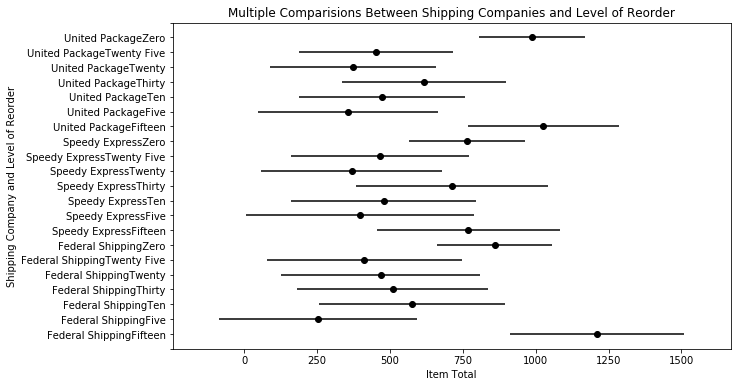

In [186]:
# create figure
fig06 = plt.figure(figsize=(5,4))
ax = fig06.add_subplot(111)

# run tukeys
tukey_results = pairwise_tukeyhsd(df_str['ItemTotal'], df_str['CompanyName']+df_str['ReorderLevel'])
tukey_plot = tukey_results.plot_simultaneous(ax=ax).show() 

# format plot
ax.axes.set_title('Multiple Comparisions Between Shipping Companies and Level of Reorder')
ax.axes.set_ylabel('Shipping Company and Level of Reorder')
ax.axes.set_xlabel('Item Total')
plt.show();

# 2.3 Results<a id='Results'></a>

# 2.4 Conclusions<a id='Conclusions'></a>

- 2.4.1 Actionable Items and Insights
- 2.4.2 Additional Visuals

## 2.4.1 Actionable Items and Insights<a id='Actionable Items and Insights'></a>

YES, REORDER LOWERS CUSTOMER SPENDING

TRY TO MOVE CLIENTS TO A REORDER LEVEL OF 15; DISCOURAGE CLIENTS FROM A REORDER LEVEL OF 5

## 2.4.2 Additional Visuals<a id='Additional Visuals'></a>

# 2.5 Future Work<a id='Future Work'></a>

Confirm that using a reorder level of 15 will be advantageous for the company.

# 2.6 References<a id='References'></a>